# HW 10 CLUSTERING BUSINESS
##cluster time trends in NYC businesses: 

#### DATA: Census Business data:

#### Download census data for businesses by ZIP code. The data is here http://www.census.gov/econ/cbp/download/

#### and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



#### NYC zip codes shape file is here
#### http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

###TASKS:
1. get and prep your data.
2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
4. Use another clustering algorithm (of your choice)
5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
6. Compare the results of the 2 algorithms
7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator.

# Get and Prepare data

In [1]:
import matplotlib.pyplot as plt
import os
import json
import urllib2
import numpy as np
import pandas as pd
import zipfile
%matplotlib inline

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson" 
zipdata = json.load(urllib2.urlopen(url))

In [2]:
zips = []
for i in zipdata['features']:
    zips.append(str(i['properties']["postalCode"]))
#print zip

In [3]:
path = os.getcwd()+'/data'
os.chdir(path)

In [4]:
tr0 = range(1994,2014)
tr1 = range(1998,2003)
ffname = "zbp{0}totals.zip"
biz_zip = set()
for i in tr0:
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    new_zip = set(df.zip).intersection(set(zips))
    biz_zip = biz_zip.union(new_zip)

In [5]:
biz_zip = sorted(biz_zip)

In [6]:
biz_data_est = pd.DataFrame(np.nan,index=biz_zip,columns=tr0)

In [7]:
for i in tr0:
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    for j in biz_zip:
        if j in list(set(df.zip)):
            biz = df[df.zip==j]
            biz_data_est.loc[j][i]=int(biz.est)

In [8]:
biz_data_est = biz_data_est.dropna()

In [9]:
biz_zip = biz_data_est.index

In [10]:
biz_data_est.to_csv('data.csv',index_label='zip')

In [11]:
df = pd.read_csv('data.csv',index_col='zip')
df1 = df.copy()
# print df1

#Kmeans Clustering

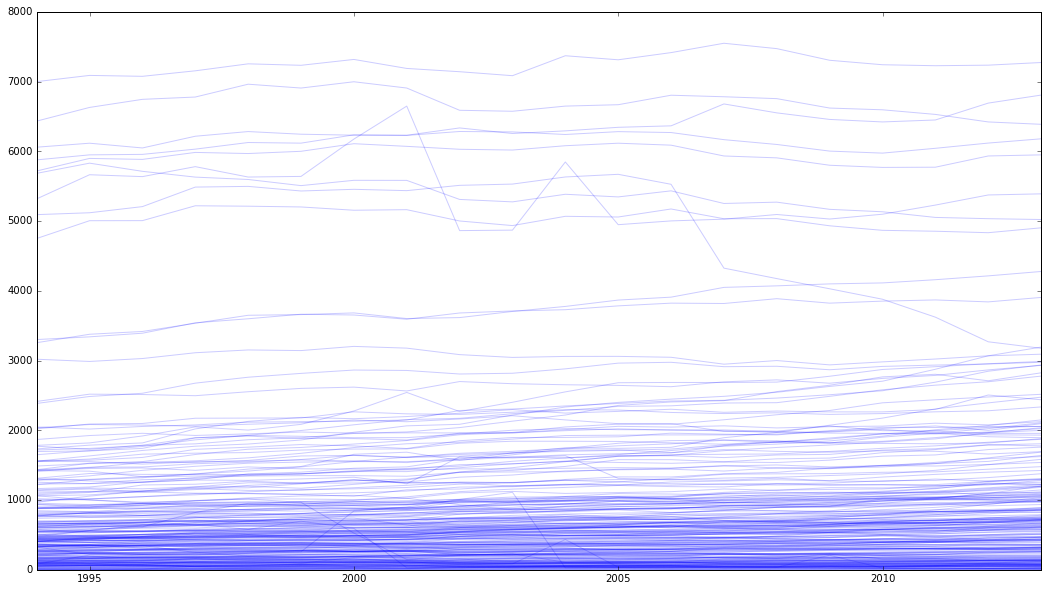

In [12]:
plt.figure(figsize=(18,10))
plt.xlim(1994,2013)
for i in range(df.shape[0]):
    plt.plot(df.iloc[i],'b',alpha=0.2)

In [14]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [15]:
import random
def k_means_clust(data,num_clust,num_iter):
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        print counter
        assignments={}
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if euclid_dist(i,j)<min_dist:
                    min_dist = euclid_dist(i,j)
                    closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    return centroids

In [16]:
x = df.values

1
2
3
4
5
6
7
8
9
10


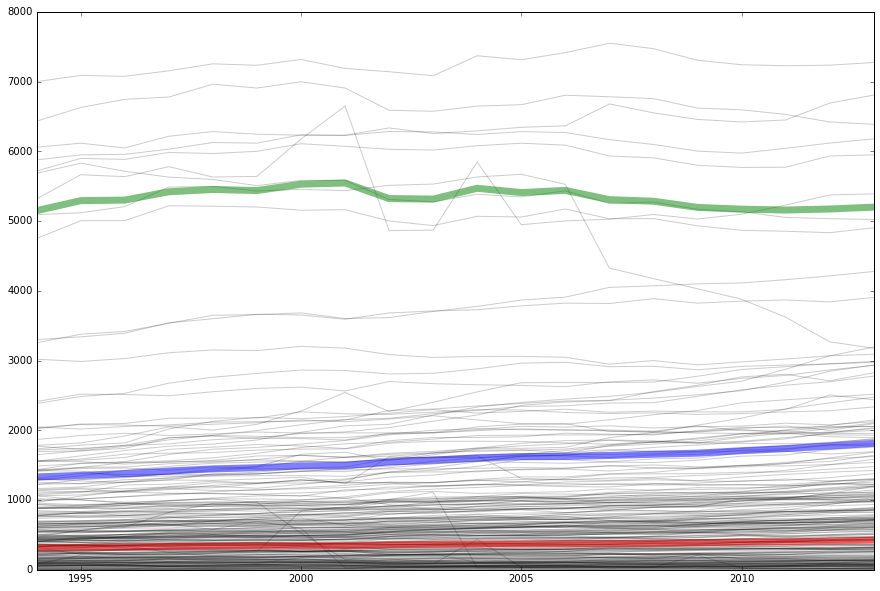

In [17]:
centroids=k_means_clust(x,3,10)
plt.figure(figsize=(15,10))
plt.xlim(1994,2013)
for i in range(len(df)):
    plt.plot(df.iloc[i],'k',alpha=0.2)
for i in range(len(centroids)):
    plt.plot(tr0,centroids[i],linewidth=7, alpha=0.5) 

1
2
3
4
5
6
7
8
9
10


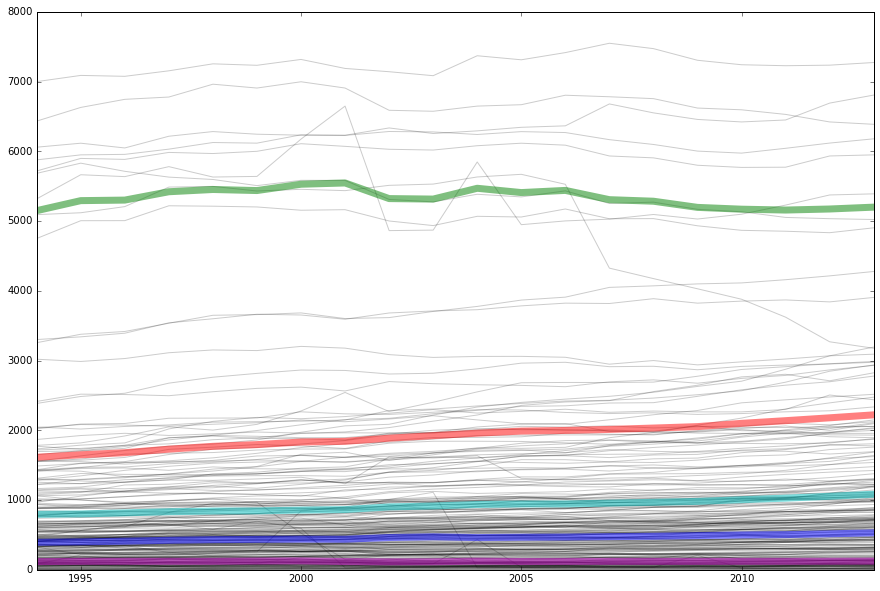

In [18]:
centroids=k_means_clust(x,5,10)
plt.figure(figsize=(15,10))
plt.xlim(1994,2013)
for i in range(len(df)):
    plt.plot(df.iloc[i],'k',alpha=0.2)
for i in range(len(centroids)):
    plt.plot(tr0,centroids[i],linewidth=7, alpha=0.5) 

1
2
3
4
5
6
7
8
9
10


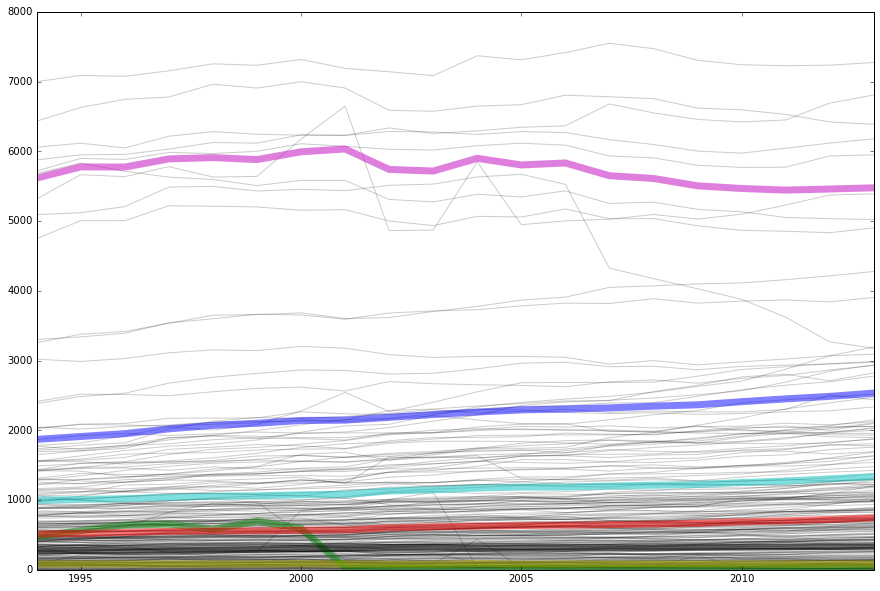

In [19]:
centroids=k_means_clust(x,7,10)
plt.figure(figsize=(15,10))
plt.xlim(1994,2013)
for i in range(len(df)):
    plt.plot(df.iloc[i],'k',alpha=0.2)
for i in range(len(centroids)):
    plt.plot(tr0,centroids[i],linewidth=7, alpha=0.5) 

#Agglomerative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,  
                              linkage='average', 
                              affinity='euclidean').fit(x)

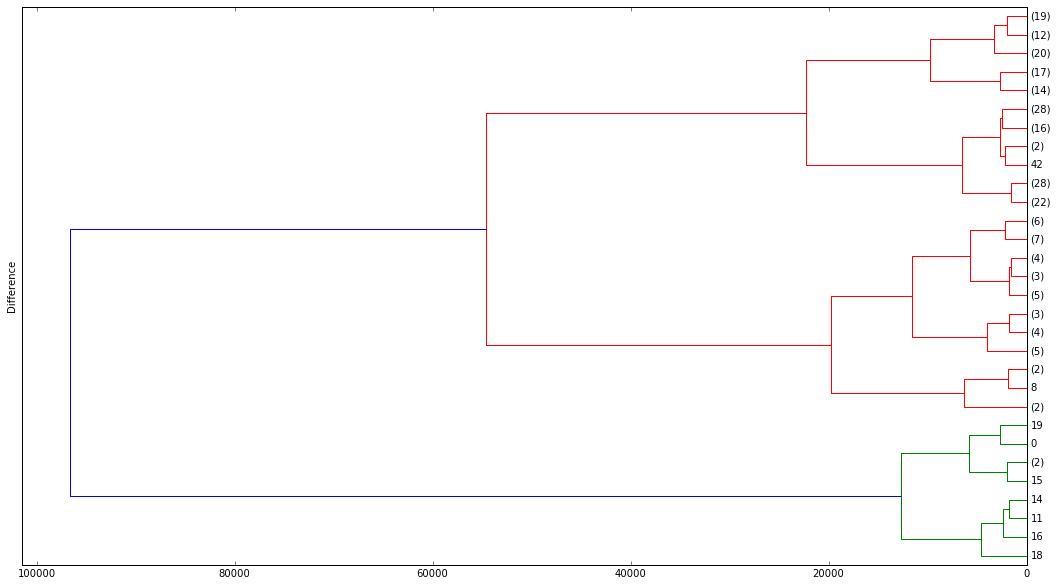

In [22]:
import scipy.cluster as scp
import pylab as pl

fig = pl.figure(figsize=(18,10))
pl.ylabel("Difference")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(x, method='ward'),leaf_rotation=90,leaf_font_size=8,orientation='right',truncate_mode='lastp')  
#pl.xticks(rotation=90)
pl.grid('off')

# Overlay data on a NYC map

In [27]:
assignments={}
#assign data points to clusters
for ind,i in enumerate(x):
    min_dist=float('inf')
    closest_clust=None
    for c_ind,j in enumerate(centroids):
        if euclid_dist(i,j)<min_dist:
            min_dist = euclid_dist(i,j)
            closest_clust=c_ind
    if closest_clust in assignments:
        assignments[closest_clust].append(ind)
    else:
        assignments[closest_clust]=[ind]

In [28]:
zips = pd.Series(df.index,dtype=str)
cluster = pd.Series(0)
for i,key in assignments.iteritems():
    for j in key:
        cluster[j] = i
df2 = pd.DataFrame({'zips':biz_zip,
                       'cluster':cluster})

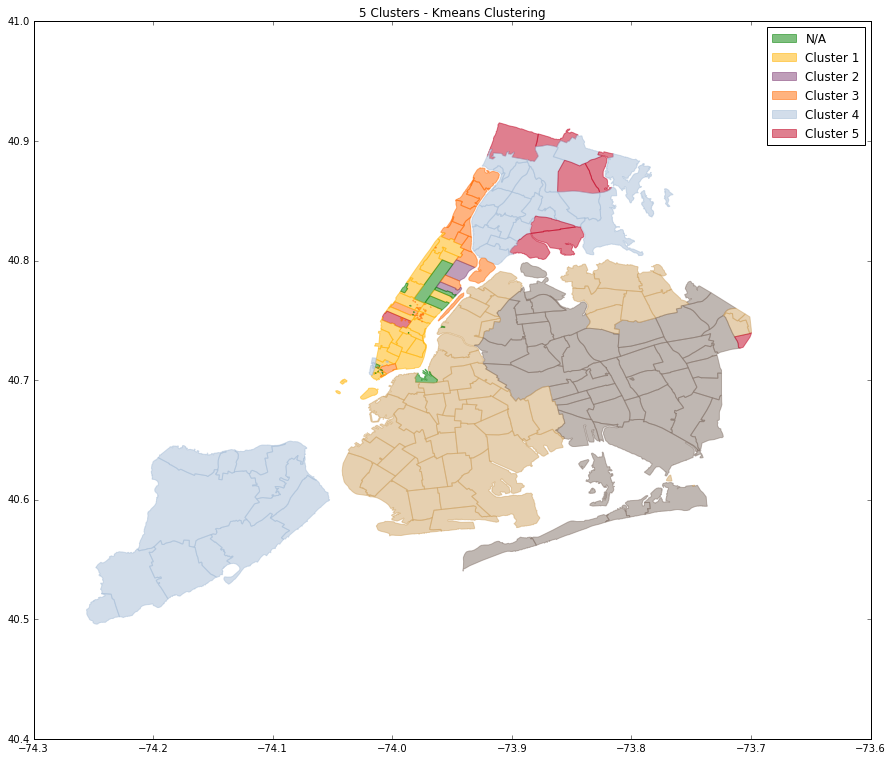

In [51]:
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in zipdata['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(df2[df2['zips']==postcode]['cluster'])]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='GREEN', ec='GREEN', alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color='GREEN', alpha=0.5, label='N/A')
patch0 = mpatches.Patch(color=kelly_colors_hex[0], alpha=0.5, label='Cluster 1')
patch1 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 2')
patch2 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 3')
patch3 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 4')
patch4 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 5')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')
plt.title('5 Clusters - Kmeans Clustering')



In [52]:

import mplleaflet
fig = plt.figure(figsize=(15,15)) 
for i in zipdata['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(df2[df2['zips']==postcode]['cluster'])]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='GREEN', ec='GREEN', alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color='GREEN', alpha=0.5, label='N/A')
patch0 = mpatches.Patch(color=kelly_colors_hex[0], alpha=0.5, label='Cluster 1')
patch1 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 2')
patch2 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 3')
patch3 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 4')
patch4 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 5')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')

mplleaflet.display(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))
#Please zoom in to NYC

In [47]:
labels = agc.labels_.astype(int)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print num_clusters
cluster = labels
df3 = pd.DataFrame({'zips':biz_zip,
                        'cluster':cluster})

5


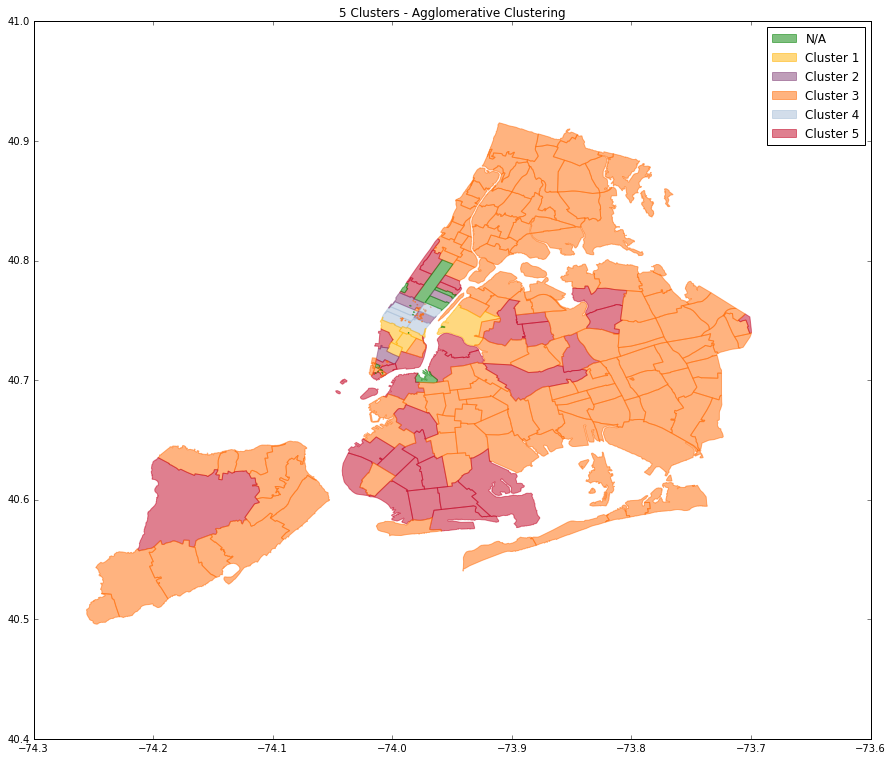

In [53]:


fig = plt.figure(figsize=(15,15)) 
for i in zipdata['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(df3[df3['zips']==postcode]['cluster'])]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='GREEN', ec='GREEN', alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color='GREEN', alpha=0.5, label='N/A')
patch0 = mpatches.Patch(color=kelly_colors_hex[0], alpha=0.5, label='Cluster 1')
patch1 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 2')
patch2 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 3')
patch3 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 4')
patch4 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 5')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')
plt.title('5 Clusters - Agglomerative Clustering')


In [54]:

fig = plt.figure(figsize=(15,15)) 
for i in zipdata['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(df3[df3['zips']==postcode]['cluster'])]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='GREEN', ec='GREEN', alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color='GREEN', alpha=0.5, label='N/A')
patch0 = mpatches.Patch(color=kelly_colors_hex[0], alpha=0.5, label='Cluster 1')
patch1 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 2')
patch2 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 3')
patch3 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 4')
patch4 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 5')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')
plt.title('5 Clusters - Agglomerative Clustering')
mplleaflet.display(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))
#Please zoom in to NYC

What we can say here is that the two different approaches (Kmeans Clustering and Agglomerative Clustering) resulted into very different clusterings. The Kmeans Clustering shared similarities with the divisions of five boroughs while the Agglomerative Clustering created a great clustering of zip code areas in Staten Island, Queens, Brooklyn and Bronx.